In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import re
import pickle
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
data = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
data.shape

(541909, 8)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data)
# profile.to_file('OnlineRetail_pj3.html')

In [5]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# InvoiceNo: code starts with letter 'c', it indicates a cancellation
# StockCode: Nominal, a 5-digit integral number
# Description: Product (item) name. Nominal.
# Quantity: Numeric
# InvoiceDate: Invoice Date and time. Numeric
# UnitPrice: Numeric, Product price per unit in sterling
# CustomerID: Nominal, a 5-digit integral number
# Country: Country name

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
print(len(df[df['Quantity']<=0]))
print(len(df[df['UnitPrice']<=0]))

print(len(df[df['CustomerID'].isna()]))
print(len(df[df['CustomerID'].isnull()]))

10624
2517
135080
135080


In [8]:
df = df.drop_duplicates()
df = df.dropna(subset=['CustomerID'])
df.shape

(401604, 8)

In [9]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [10]:
for col in df.columns:
    print('%s:' %col, len(df[col].unique()))

InvoiceNo: 22190
StockCode: 3684
Description: 3896
Quantity: 436
InvoiceDate: 20460
UnitPrice: 620
CustomerID: 4372
Country: 37


In [11]:
print(len(df[df['Quantity']<=0]))
print(len(df[df['UnitPrice']<=0]))

8872
40


In [12]:
df[df['UnitPrice']<=0].index

Int64Index([  9302,  33576,  40089,  47068,  47070,  56674,  86789, 130188,
            139453, 145208, 157042, 187613, 198383, 279324, 282912, 285657,
            298054, 314745, 314746, 314747, 314748, 358655, 361825, 379913,
            395529, 420404, 436428, 436597, 436961, 439361, 446125, 446793,
            446794, 454463, 454464, 479079, 479546, 480649, 485985, 502122],
           dtype='int64')

In [13]:
df.drop(index=df[df['UnitPrice']<=0].index, inplace=True)
print(len(df[df['UnitPrice']<=0]))

0


In [14]:
print(len(df[df['Quantity']<=0]))
df[df['Quantity']<=0]

8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [15]:
df.iloc[141:143]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098,United Kingdom


In [16]:
df['cancel'] = df['InvoiceNo'].str.extract('([C])')[0]
df['cancel'].replace(['C',np.nan],[1,0],inplace=True)

df['InvoiceNo'] = df['InvoiceNo'].str.extract('(\d{6})')[0]

df.iloc[141:143]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel
141,536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,1
142,NaN,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098,United Kingdom,0


In [17]:
print(len(df[df['InvoiceNo']==np.nan]))
print(len(df[df['cancel']==np.nan]))
len(df[df['cancel']==1])

0
0


8872

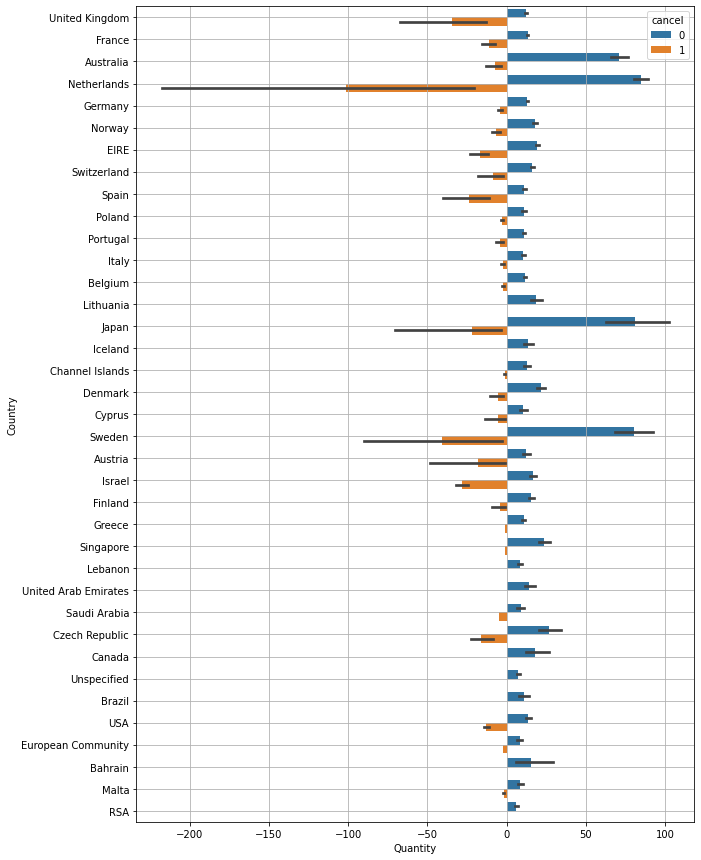

In [18]:
# df[['Country','cancel']].groupby('Country').sum()
plt.figure(figsize=(10,15))
sb.barplot(x='Quantity',y='Country',hue='cancel',data=df)
plt.grid()
plt.show()

#### Nhận xét: 
- Với InvoiceNo có 'C' đứng trước mã đơn hàng thì tất cả số lượng ra âm
- 8872 đơn hàng bị huỷ
- Có số lượng đơn hàng huỷ lớn không có nghĩa là đơn hàng đó nhiều tiền => số lượng hàng của hoá đơn huỷ * giá sản phẩm + số lượng hàng của hoá đơn mua * giá sản phẩm

In [19]:
print(len(df[df['Description']=='Manual']))
df[df['Description']=='Manual']

454


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel
2239,NaN,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,0
2250,NaN,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,0
6798,NaN,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom,0
7976,NaN,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom,0
8530,NaN,M,Manual,36,2010-12-05 12:43:00,0.85,16327,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
531432,NaN,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom,0
533082,581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom,1
534308,581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom,1
538321,NaN,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom,0


In [20]:
df['Quantity'][df['Description']=='Discount'].value_counts()

-1      72
-240     1
-96      1
-720     1
-48      1
-18      1
Name: Quantity, dtype: int64

In [21]:
df_c = df[['CustomerID','cancel']].groupby('CustomerID',as_index=False).sum()
print(df_c.shape)
df_c.head()

(4371, 2)


,CustomerID,cancel
0,12346,1
1,12347,0
2,12348,0
3,12349,0
4,12350,0


In [22]:
print(len(df_c.CustomerID.unique()))
df_c.describe()

4371


,CustomerID,cancel
count,4371.000000,4371.000000
mean,15300.145276,2.029741
std,1722.310262,7.316858
min,12346.000000,0.000000
25%,13813.500000,0.000000
50%,15301.000000,0.000000
75%,16778.500000,1.000000
max,18287.000000,226.000000


In [23]:
print(len(df[df['Quantity']<=0]))
print(len(df[df['UnitPrice']<=0]))

8872
0


In [24]:
df.drop(index=df[df['Quantity']<=0].index, inplace=True)
df.drop(index=df[df['UnitPrice']<=0].index, inplace=True)

#### Nhận xét: 
- Với StockCode = 'D', Description = 'Discount' thì số lượng ra âm
- 77 đơn hàng được giảm giá, số lượng chủ yếu là âm 1

### InvoiceDate

In [25]:
df['date'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel,date
0,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,2010-12-01 08:26:00
1,NaN,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00
2,NaN,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,2010-12-01 08:26:00
3,NaN,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00
4,NaN,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,2010-12-01 08:26:00


In [26]:
df['date'].min().date(), df['date'].max().date()

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

In [27]:
(df['date'].max().date() - df['date'].min().date()).days/365

1.021917808219178

In [28]:
pd.DatetimeIndex(df['date']).month.value_counts()

11    63168
10    48793
12    42696
9     39669
5     28073
6     26926
3     26870
8     26790
7     26580
4     22433
1     20988
2     19706
Name: date, dtype: int64

In [29]:
pd.DatetimeIndex(df['date']).year.value_counts()

2011    367022
2010     25670
Name: date, dtype: int64

In [30]:
pd.to_datetime(df['date']).dt.to_period('M').value_counts()

2011-11    63168
2011-10    48793
2011-09    39669
2011-05    28073
2011-06    26926
2011-03    26870
2011-08    26790
2011-07    26580
2010-12    25670
2011-04    22433
2011-01    20988
2011-02    19706
2011-12    17026
Freq: M, Name: date, dtype: int64

In [31]:
# Số lượng giao dịch của công ty tăng mạnh vào những tháng cuối năm
# Thiếu dữ liệu tháng 4 và 11 năm 2010

In [32]:
df['value'] = df['Quantity'] * df['UnitPrice']

In [33]:
data1 = df.copy()

In [34]:
data1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'cancel', 'date', 'value'],
      dtype='object')

In [35]:
len(df[['CustomerID', 'Country']].drop_duplicates())

4346

In [36]:
df1 = df[['CustomerID', 'Country']].drop_duplicates()
df1.shape

(4346, 2)

In [37]:
df1.CustomerID.value_counts()

12429    2
12370    2
12457    2
12431    2
12394    2
        ..
17730    1
15681    1
13632    1
15677    1
16384    1
Name: CustomerID, Length: 4338, dtype: int64

In [38]:
df1[df1['CustomerID']==12429]

,CustomerID,Country
20017,12429,Denmark
168399,12429,Austria


In [39]:
max_date = df['date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

dfnew = df.groupby('CustomerID',as_index=True).agg({'date': Recency,
                                                     'InvoiceNo': Frequency,  
                                                     'value': Monetary })
dfnew.columns = ['Recency', 'Frequency', 'Monetary']
print(dfnew.shape)
dfnew.head()

(4338, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,1,4310.00
12348,75,1,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [40]:
dfnew.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.0,4338.00000
mean,92.059474,1.0,2048.68808
std,100.012264,0.0,8985.23022
min,0.000000,1.0,3.75000
25%,17.000000,1.0,306.48250
50%,50.000000,1.0,668.57000
75%,141.750000,1.0,1660.59750
max,373.000000,1.0,280206.02000


In [48]:
# df_new = dfnew.copy() # checkpoint

In [67]:
df_new.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,1,4310.00
12348,75,1,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [68]:
dfnew = df_new.copy()

# Models

In [75]:
data = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
data.shape

(541909, 8)

In [76]:
data.drop_duplicates(inplace=True)
data.dropna(subset=['CustomerID'],inplace=True)
data.drop(index=data[data['Quantity']<=0].index, inplace=True)
data.drop(index=data[data['UnitPrice']<=0].index, inplace=True)
data.CustomerID = data.CustomerID.astype(int)
data['date']=pd.to_datetime(data.InvoiceDate) 

data.shape

(392692, 9)

In [77]:
df = data.copy()
df['value'] = df['Quantity'] * df['UnitPrice']

In [78]:
max_date = df['date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

dfnew = df.groupby('CustomerID').agg({'date': Recency,'InvoiceNo': Frequency,  
                                      'value': Monetary })
dfnew.columns = ['Recency', 'Frequency', 'Monetary']
print(dfnew.shape)
dfnew.head()

(4338, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


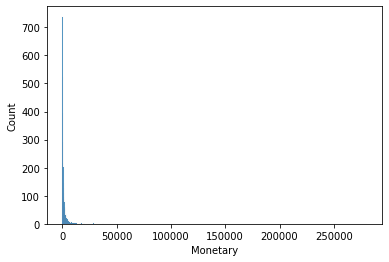

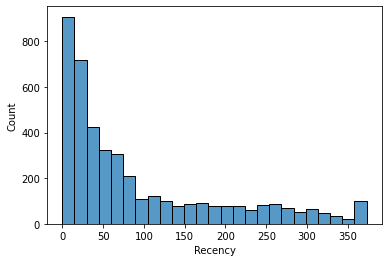

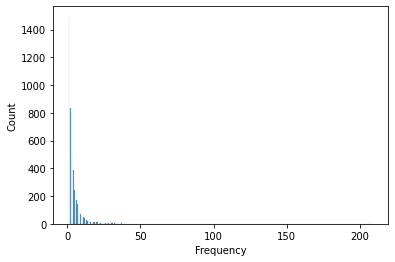

In [80]:
for col in ['Monetary','Recency', 'Frequency']:
    sb.histplot(dfnew[col])
    plt.show()

In [81]:
# dfnew_copy = dfnew.copy()

In [99]:
# dfnew = dfnew_copy.copy()

In [100]:
dfnew['Monetary']=np.log(dfnew_copy.Monetary)
dfnew['Frequency']=np.log(dfnew_copy.Frequency)
# dfnew['Recency']=np.log(dfnew_copy.Recency)

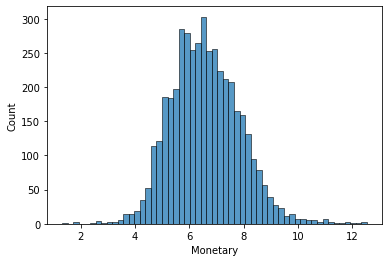

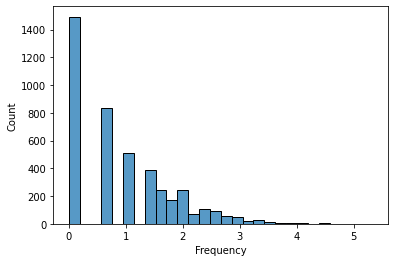

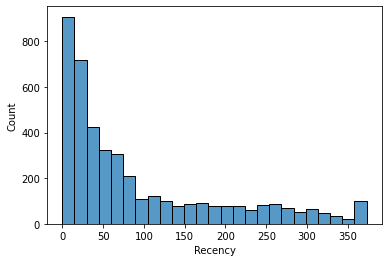

In [101]:
for col in ['Monetary', 'Frequency','Recency']:
    sb.histplot(dfnew[col])
    plt.show()

In [102]:
dfnew.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,0.000000,11.253942
12347,2,1.945910,8.368693
12348,75,1.386294,7.494007
12349,18,0.000000,7.471676
12350,310,0.000000,5.812338


In [176]:
def rfm(df_rfm):
    
    r_labels = range(4, 0, -1)
    f_labels = range(1, 5)
    m_labels = range(1, 5)

    r_groups = pd.qcut(df_rfm['Recency'].rank(method='first'), q=4, labels=r_labels)
    f_groups = pd.qcut(df_rfm['f'].rank(method='first'), q=4, labels=f_labels)
    m_groups = pd.qcut(df_rfm['m'].rank(method='first'), q=4, labels=m_labels)

    df_rfm = df_rfm.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)

    def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
    df_rfm['RFM_Segment'] = df_rfm.apply(join_rfm, axis=1)

    lst = df_rfm['label'].unique()
    for x in lst:
        print('>>> RFM_Level: %s' %x)
        df_new = pd.DataFrame(df_rfm[df_rfm['label']==x]['RFM_Segment'].value_counts())
        plt.figure(figsize=(10,4))
        sb.barplot(y=df_new.RFM_Segment,x=df_new.index)
        plt.ylabel('Count')
        plt.xlabel('RFM_Segment')
        plt.grid()
        plt.show()

In [177]:
def model_plot(df):
    
    df_agg = df.groupby('label').agg({
        'Recency': ['mean','min','max'],
        'f': ['mean','min','max'],
        'm': ['mean', 'sum', 'count']}).round(0)

    df_agg.columns = df_agg.columns.droplevel()
    df_agg.columns = ['r_mean','r_min','r_max',
                      'f_mean','f_min','f_max',
                      'm_mean','m_sum', 'Count']
    df_agg['Percent'] = round((df_agg['Count']/df_agg.Count.sum())*100, 2)
    df_agg['%income'] = round((df_agg['m_sum']/df_agg.m_sum.sum())*100, 2)

    # Reset the index
    df_agg = df_agg.reset_index()
    df_agg.drop('m_sum',axis=1,inplace=True)

    
    fig = px.scatter(df_agg, x="r_mean", y="m_mean", size="f_mean",
                     color="label", hover_name="label", size_max=100)
    fig.show()
    
    fig = px.scatter_3d(df, x='Recency', y='f', z='m',
                    color = 'label', opacity=0.5)
    fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
    fig.show()
    
    return df_agg

# GMM

In [112]:
df_gmm = dfnew.copy()

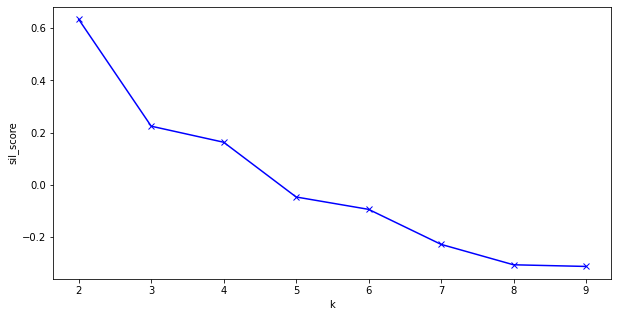

In [113]:
###
from sklearn import metrics
from sklearn.mixture import GaussianMixture

lst_sil = []
K = range(2,10)
for k in K:
    gmm = GaussianMixture(n_components=k).fit(df_gmm)
    labels = gmm.predict(df_gmm)
    sil = metrics.silhouette_score(df_gmm,labels,metric='euclidean')
    lst_sil.append(sil)

plt.figure(figsize=(10,5))
plt.plot(K, lst_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.show()

In [178]:
gmm = GaussianMixture(n_components=4).fit(df_gmm)
df_gmm['label'] = gmm.predict(df_gmm)

>>> RFM_Level: 1


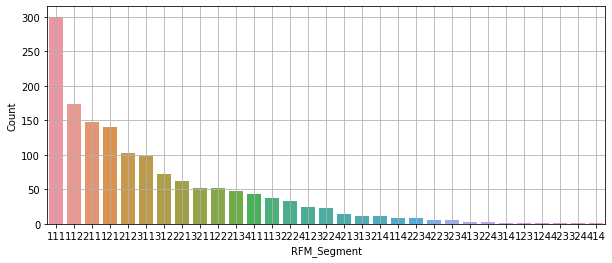

>>> RFM_Level: 0


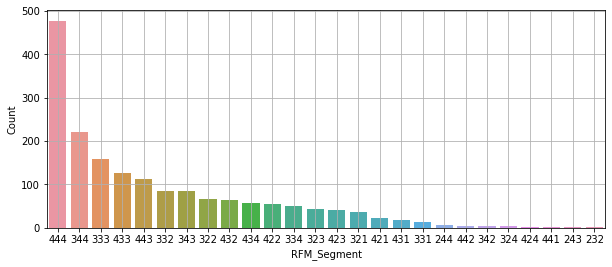

>>> RFM_Level: 3


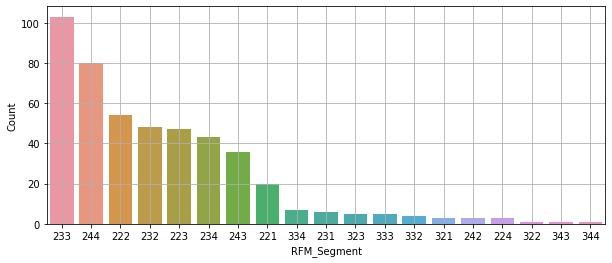

>>> RFM_Level: 2


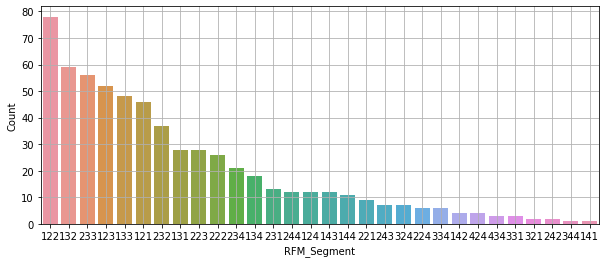

In [180]:
rfm(df_gmm)

In [181]:
model_plot(df_gmm)

,label,r_mean,r_min,r_max,f_mean,f_min,f_max,m_mean,Count,Percent,%income
0,0,17.0,0,59,8.0,2.0,209.0,3768.0,1763,40.64,74.75
1,1,156.0,0,373,1.0,1.0,1.0,411.0,1493,34.42,6.91
2,2,169.0,0,373,3.0,2.0,34.0,1565.0,612,14.11,10.78
3,3,68.0,43,120,4.0,2.0,17.0,1431.0,470,10.83,7.57


In [153]:
# import pickle

# with open('models/gmm4.pkl','wb') as file:
#     pickle.dump(df_gmm,file)

## Nhận xét
- Nhóm 0: nhóm khách hàng giá trị nhất, có số khách hàng và doanh thu cao nhất
- Nhóm 1 với nhóm 2 có recency giống nhau, từ 0 đến 373 phủ khắp dữ liệu, 2 nhóm này chênh lệch nhiều về tần suất và chi tiêu
- Nhóm 1 có chiếm % doanh thu thấp nhất, nhóm khách hàng chỉ giao dịch 1 lần, có số lượng khách hàng đứng thứ 2
- Nhóm 2: chiếm % doanh thu cao thứ 2
- Nhóm 3: nhóm không giao dịch trên 43 ngày, có tần suất chi tiêu trung bình đứng thứ 2, là nhóm mua hàng nhiều nhưng không hoạt động 1 thời gian

### Đánh giá: Thuật toán phân chia chưa hợp lý lắm, không nêu được đặc điểm nhóm khách hàng => không áp dụng thuật toán

# KMeans

In [164]:
df_k = dfnew.copy()

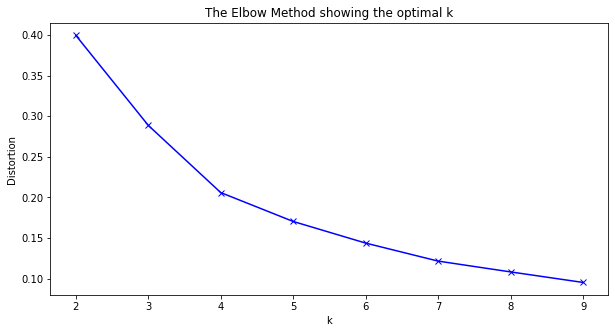

In [156]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_k)
    distortions.append(sum(np.min(cdist(df_k, kmeanModel.cluster_centers_, 
                                        'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [182]:
kmean = KMeans(n_clusters=4).fit(df_k)
centroids = kmean.cluster_centers_
df_k["label"] = kmean.labels_

>>> RFM_Level: 3


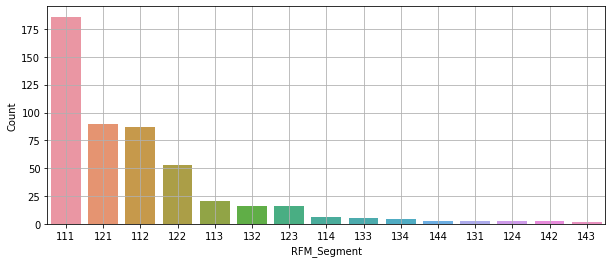

>>> RFM_Level: 2


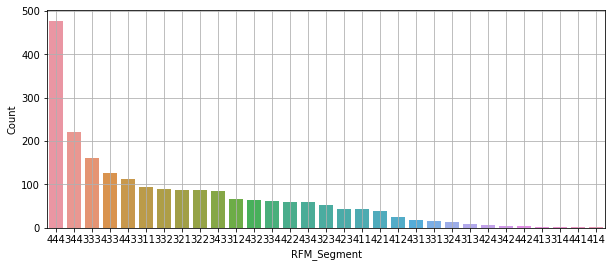

>>> RFM_Level: 0


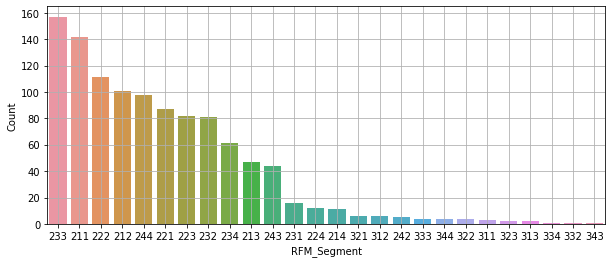

>>> RFM_Level: 1


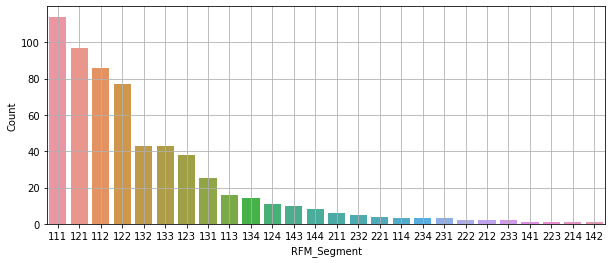

In [184]:
rfm(df_k)

In [185]:
model_plot(df_k)

,label,r_mean,r_min,r_max,f_mean,f_min,f_max,m_mean,Count,Percent,%income
0,0,81.0,50,136,3.0,1.0,17.0,1035.0,1089,25.10,12.68
1,1,191.0,137,249,2.0,1.0,12.0,725.0,616,14.20,5.02
2,2,19.0,0,49,6.0,1.0,209.0,3294.0,2135,49.22,79.13
3,3,308.0,250,373,1.0,1.0,34.0,564.0,498,11.48,3.16


In [170]:
# with open('models/kmeans4.pkl','wb') as file:
#     pickle.dump(df_k,file)

## Nhận xét
- Nhóm 2: nhóm khách hàng giá trị nhất, mang lại doanh thu cao nhất, bao gồm cả nhóm khách hàng mới
- Nhóm 0: nhóm đứng thứ 2 về tần suất, chi tiêu, nhóm không hoạt động trên 50 ngày
- Nhóm 1: nhóm không hoạt động từ 137 ngày đến 249 ngày, đứng thứ 3 về doanh thu
- Nhóm 3: nhóm co nguy cơ ra đi cao nhất, không giao dịch trên 250 ngày, chiếm % doanh thu thấp nhất

### Đánh giá: Thuật toán phân chia khá hợp lý, nhóm 2 còn có thể chia thêm nhóm khách hàng mới => Có thể áp dụng (tạm chấp nhận)

# Hierarchy

In [162]:
df_hie = dfnew.copy()

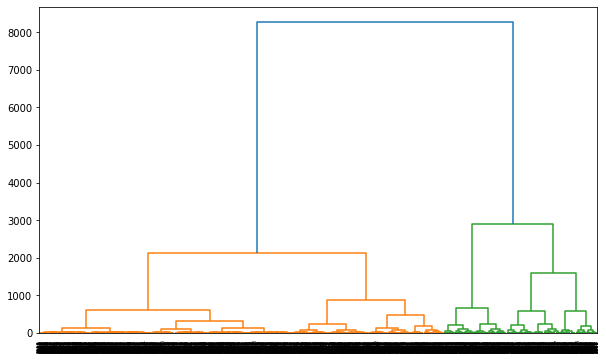

In [163]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 6))
dend = shc.dendrogram(shc.linkage(df_hie, method='ward'))

In [186]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean').fit(df_hie) 
df_hie["label"] = cluster.labels_

>>> RFM_Level: 3


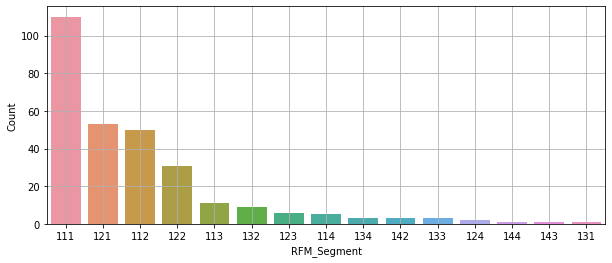

>>> RFM_Level: 1


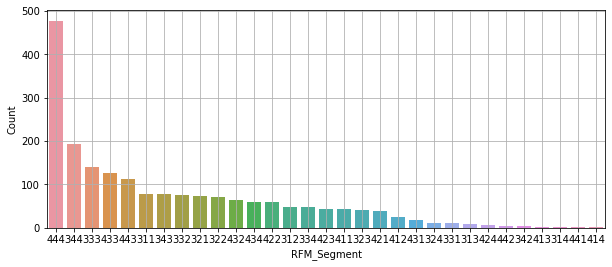

>>> RFM_Level: 0


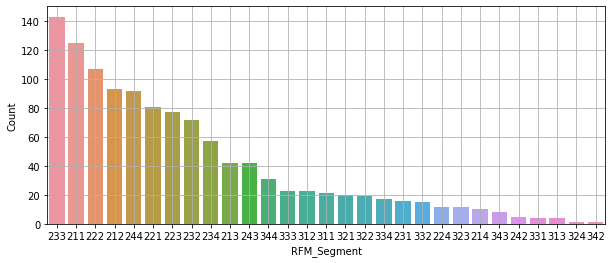

>>> RFM_Level: 2


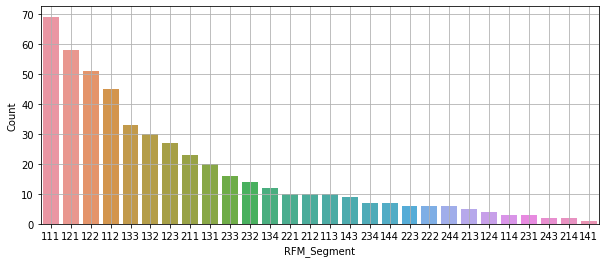

>>> RFM_Level: 4


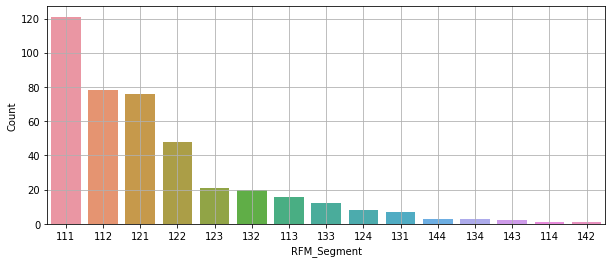

In [188]:
rfm(df_hie)

In [189]:
model_plot(df_hie)

,label,r_mean,r_min,r_max,f_mean,f_min,f_max,m_mean,Count,Percent,%income
0,0,72.0,42,124,3.0,1.0,17.0,1104.0,1173,27.04,14.57
1,1,17.0,0,40,7.0,1.0,209.0,3449.0,1970,45.41,76.46
2,2,165.0,126,208,2.0,1.0,12.0,741.0,489,11.27,4.08
3,3,336.0,294,373,1.0,1.0,34.0,651.0,289,6.66,2.12
4,4,250.0,210,292,1.0,1.0,12.0,591.0,417,9.61,2.77


In [175]:
# with open('models/hie5.pkl','wb') as file:
#     pickle.dump(df_hie,file)

## Nhận xét
- Nhóm 1: nhóm khách hàng giá trị nhất, mang lại doanh thu cao nhất, bao gồm cả nhóm khách hàng mới
- Nhóm 0: nhóm đứng thứ 2 về tần suất, chi tiêu, nhóm không hoạt động trên 42 ngày
- Nhóm 2: nhóm không hoạt động từ 126 ngày đến 208 ngày, đứng thứ 3 về doanh thu
- Nhóm 4: nhóm khách hàng tiềm năng hơn nhóm 3, ít tiềm năng hơn nhóm 2
- Nhóm 3: nhóm co nguy cơ ra đi cao nhất, không giao dịch trên 294 ngày, chiếm % doanh thu thấp nhất

### Đánh giá: Thuật toán phân chia khá hợp lý, nhóm 1 còn có thể chia thêm nhóm khách hàng mới => Có thể áp dụng (tạm chấp nhận)